<a href="https://colab.research.google.com/github/zakilbaki/ml-2025/blob/main/mini_project_titanic/01_EDA_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import sys
assert sys.version_info >= (3, 7)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher tous les graphiques directement
%matplotlib inline

In [73]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"zakariaouahabi","key":"3a5a8e535ed32d649f64fef2c2ac7fdf"}'}

In [74]:
import os

# Créer le dossier .kaggle et y déplacer kaggle.json
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Protéger le fichier
!chmod 600 /root/.kaggle/kaggle.json


In [75]:
!kaggle competitions download -c titanic


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 145MB/s]


In [76]:
import zipfile

with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("titanic")


In [77]:
import pandas as pd

train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")


In [78]:
# Affiche les 5 premières lignes
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train_df.shape

(891, 12)

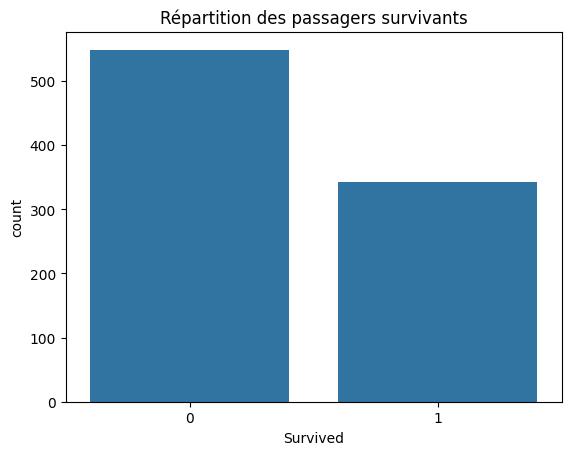

,proportion
Survived,
0,0.616162
1,0.383838


In [80]:
sns.countplot(data=train_df, x='Survived')
plt.title("Répartition des passagers survivants")
plt.show()

# En pourcentage
train_df['Survived'].value_counts(normalize=True)


**61% des passagers sont décedés = variable cible relativement equilibrés**

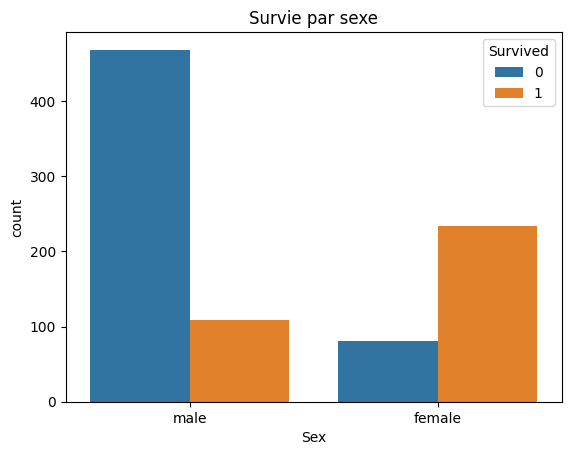

,Survived
Sex,
female,0.742038
male,0.188908


In [81]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survie par sexe")
plt.show()
# Taux de survie par sexe
train_df.groupby('Sex')['Survived'].mean()


ici on voit comment une variable primordiale affecte le taux de survie
rq: on voit ici que le taux de survie chez la gente feminine est plus éleve

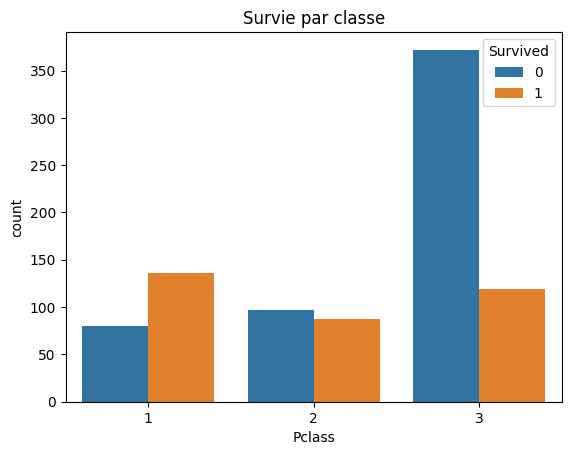

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [82]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survie par classe")
plt.show()

# Taux de survie par classe
train_df.groupby('Pclass')['Survived'].mean()


ici on remarque que le taux de survie de la 1ere classe est beaucoup plus éleve que celui des autres classe , la 3 eme ayant le taux de survie le plus bas

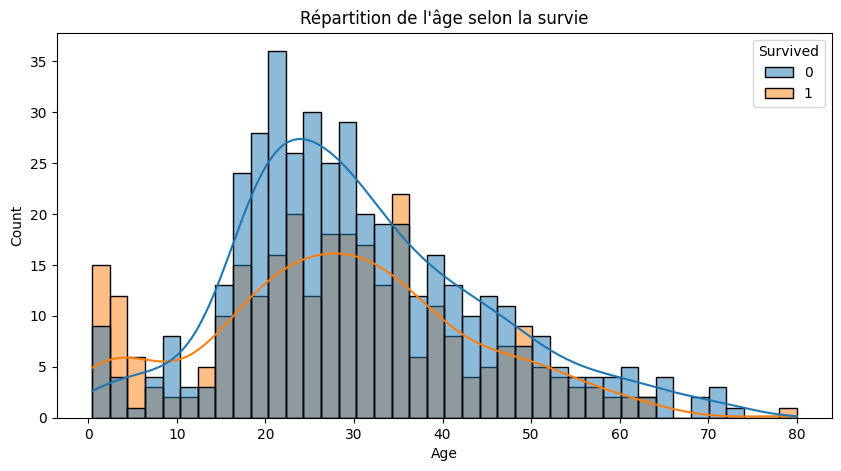

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=40)
plt.title("Répartition de l'âge selon la survie")
plt.show()


categories d'age ou nbr de survivant > nbr de deces => [0 6]u[12 14]u[34,36]u[48,50]u[78 80] cela traduit le fait que la priorité à été donné aux jeunes effectifs

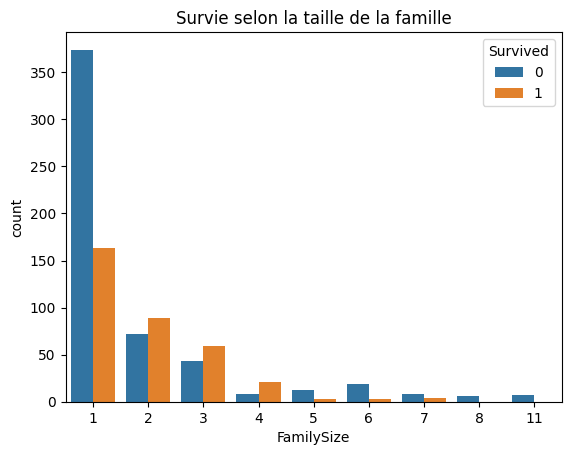

In [84]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
sns.countplot(data=train_df, x='FamilySize', hue='Survived')
plt.title("Survie selon la taille de la famille")
plt.show()


Les familles de taille 2 à 4 présentent un taux de survie supérieur à 50%.

➡️ Cela pourrait s'expliquer par :
- une **meilleure proximité aux sorties**,
- une **solidarité familiale** facilitant l’évacuation,

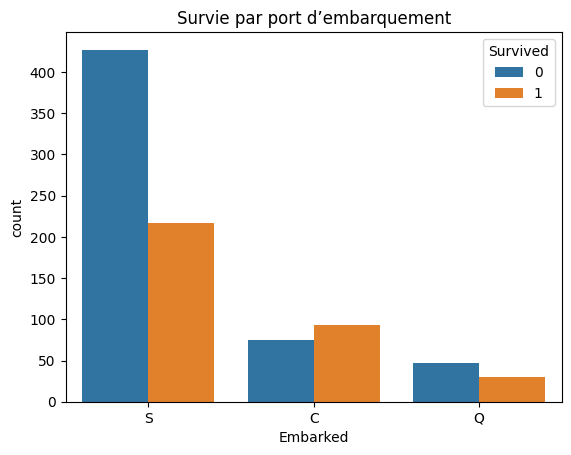

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [85]:
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title("Survie par port d’embarquement")
plt.show()

# Taux de survie par port
train_df.groupby('Embarked')['Survived'].mean()


le taux d'embarquement du port c est le seul superieur à 50 %

Cherbourg (C) = plus riche, mieux logé → meilleure survie

Southampton (S) = majorité des passagers + classes variées → survie moyenne ou basse

Queenstown (Q) = pauvres, 3e classe → faible survie

explications probable en coherence avec le fait que les passager de la premiere classe ont le meilleur taux de survie ( correlation entre les 2 ?)

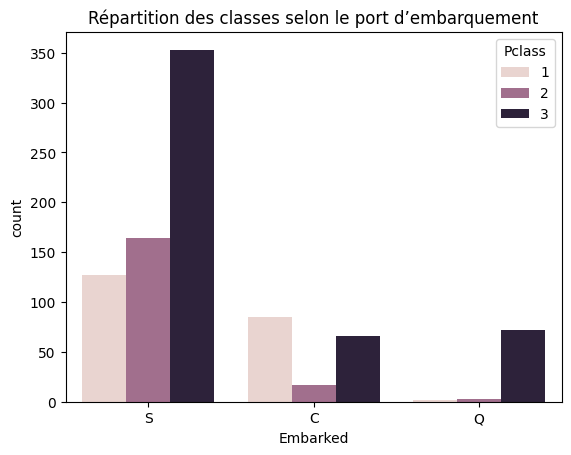

In [86]:
#test de la thèorie
# Tableau croisé : nombre de passagers par port et par classe
pd.crosstab(train_df['Embarked'], train_df['Pclass'], margins=True)
sns.countplot(data=train_df, x='Embarked', hue='Pclass')
plt.title("Répartition des classes selon le port d’embarquement")
plt.show()


l'hypothéses à été vérifié

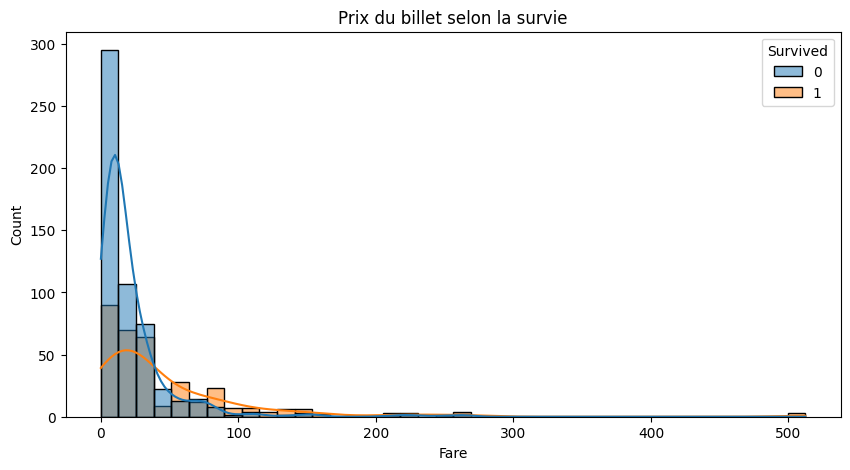

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True, bins=40)
plt.title("Prix du billet selon la survie")
plt.show()


📌 Hypothèse : Les personnes **fortunées** (1ʳᵉ classe, billet cher, port C) ont été **priorisées lors de l’évacuation**, à cause de :

- Leur **proximité physique aux canots** (cabines proches des ponts supérieurs)
- Leur **visibilité / statut social**
- Une majorité de **femmes riches** (embarquées à Cherbourg en 1ʳᵉ classe)
- Le **règlement maritime de l’époque** : “Women and children first”

➡️ Cela explique pourquoi les variables `Fare`, `Pclass`, `Embarked`, et `Sex` sont **corrélées positivement** à la survie.


In [88]:
train_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


cabine le nombre de nan surpasse la moitié des données => drop it

In [89]:
train_df_d1 = train_df.drop('Cabin', axis=1)


In [90]:
train_df_d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


📌 La variable `Age` contient environ 19% de valeurs manquantes.

➡️ Pour ne pas perdre cette variable importante, on impute les valeurs manquantes par la **médiane globale**, une méthode robuste aux extrêmes.

🛠️ Plus tard, on pourra améliorer en utilisant une **médiane par groupe (`Title`, `Pclass`)**.

In [91]:
train_df_d1['Age'].fillna(train_df_d1['Age'].median(), inplace=True)


/tmp/ipython-input-91-1994452806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_d1['Age'].fillna(train_df_d1['Age'].median(), inplace=True)


In [92]:
train_df_d1['Title'] = train_df_d1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


the title  is important because it show's the social status

In [93]:
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [94]:
X = train_df_d1.drop('Survived', axis=1)
y = train_df_d1['Survived']

je devais commencer par ca /setting up the target

In [95]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,Rev
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,Mr


In [96]:
X = X.drop('PassengerId', axis=1)


identifiant unique => inutile

In [97]:
X = X.drop(['SibSp', 'Parch'], axis=1)


familly size suffit pour prendre en compte c'est deux variable

In [98]:
X = X.drop('Ticket', axis=1)
X = X.drop('Name', axis=1)

In [99]:
X

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,3,male,22.0,7.2500,S,2,Mr
1,1,female,38.0,71.2833,C,2,Mrs
2,3,female,26.0,7.9250,S,1,Miss
3,1,female,35.0,53.1000,S,2,Mrs
4,3,male,35.0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,1,Rev
887,1,female,19.0,30.0000,S,1,Miss
888,3,female,28.0,23.4500,S,4,Miss
889,1,male,26.0,30.0000,C,1,Mr


maintenat il faut encoder les variables categorique càd sex /title /embarked

In [100]:
X['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

beaucoup de titre donc il faut les categorises pour reduire le nbr dde variabke apres le one hot encoding

In [101]:
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# 3. Regrouper les titres rares dans une même catégorie
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
               'Rev', 'Sir', 'Jonkheer', 'Dona']
X['Title'] = X['Title'].replace(rare_titles, 'Rare')
X['Title'] = X['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# 4. One-hot encoding pour Embarked et Title
X = pd.get_dummies(X, columns=['Embarked', 'Title'], drop_first=True)


In [102]:
# 1. Créer les nouvelles features
X['IsAlone'] = (X['FamilySize'] == 1).astype(int)
X['FarePerPerson'] = X['Fare'] / X['FamilySize']
X['AgeGroup'] = pd.cut(X['Age'], bins=[0, 12, 18, 35, 50, 80], labels=False)
X['FareBand'] = pd.qcut(X['Fare'], 4, labels=False)
X['Age*Pclass'] = X['Age'] * X['Pclass']  # ⚠️ à faire AVANT suppression de 'Age'

# 2. Supprimer les colonnes originales devenues redondantes
X.drop(columns=['Fare', 'FamilySize', 'Age'], inplace=True)

# 3. One-hot encode les nouvelles features binned
X = pd.get_dummies(X, columns=['AgeGroup', 'FareBand'], drop_first=True)

# 4. Afficher les colonnes finales
print("✅ Colonnes finales de X :", X.columns.tolist())


✅ Colonnes finales de X : ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'IsAlone', 'FarePerPerson', 'Age*Pclass', 'AgeGroup_1', 'AgeGroup_2', 'AgeGroup_3', 'AgeGroup_4', 'FareBand_1', 'FareBand_2', 'FareBand_3']


map pour 2 categoris / one hot encodding pour une autre

In [112]:
# 1. Charger les données
test = pd.read_csv("titanic/test.csv")
X_test = test.copy()

# 2. Imputation des valeurs manquantes
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# 3. Feature engineering
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1
X_test['IsAlone'] = (X_test['FamilySize'] == 1).astype(int)
X_test['FarePerPerson'] = X_test['Fare'] / X_test['FamilySize']
X_test['FarePerPerson'] = X_test['FarePerPerson'].fillna(X['FarePerPerson'].median())  # sécurité

X_test['Age*Pclass'] = X_test['Age'] * X_test['Pclass']

# 4. Extraire et encoder les titres
X_test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
X_test['Title'] = X_test['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
X_test['Title'] = X_test['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# 5. AgeGroup (mêmes bins que l'entraînement)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=[0, 12, 18, 35, 50, 80], labels=False)

# 6. FareBand (utiliser les bins du train)
fare_bins = pd.qcut(X['FarePerPerson'], 4, retbins=True)[1]
X_test['FareBand'] = pd.cut(X_test['FarePerPerson'], bins=fare_bins, labels=False, include_lowest=True)

# 7. Supprimer colonnes inutiles
X_test.drop(columns=['Cabin', 'Ticket', 'Name', 'Age', 'Fare', 'FamilySize'], inplace=True)

# 8. One-hot encoding
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Pclass', 'Title', 'AgeGroup', 'FareBand'], drop_first=True)

# 9. Aligner avec les colonnes d'entraînement
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X.columns]


In [113]:
# Création du dossier si besoin
import os
os.makedirs("data", exist_ok=True)


# Sauvegarder X et y dans des fichiers CSV
X.to_csv('data/X_preprocessed.csv', index=False)
y.to_csv('data/y_preprocessed.csv', index=False)
X_test.to_csv('data/X_test_preprocessed.csv', index=False)


In [114]:
from google.colab import files

# Télécharger les deux fichiers
#files.download("data/X_preprocessed.csv")
#files.download("data/y_preprocessed.csv")
files.download("data/X_test_preprocessed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>